 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

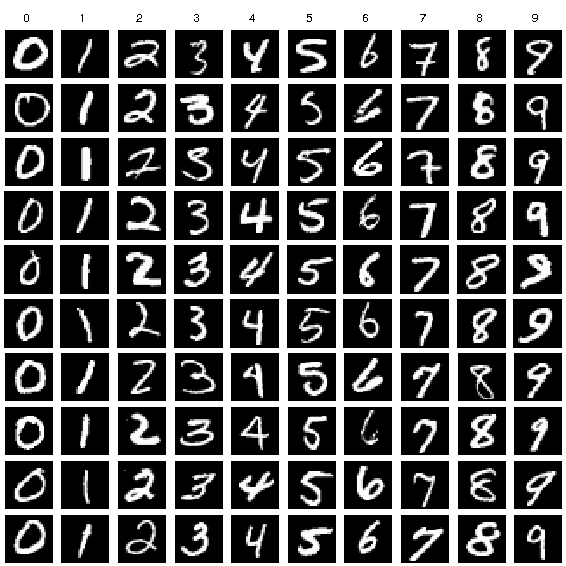

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Set matplotlib for better visualisation
plt.style.use('ggplot') # Use ggplot style for more sophisticated visuals :)

# Set seed for reproducibility
np.random.seed(42)

# This can be used to set any configurations I might need globally,
# such as default figure size, etc.
plt.rcParams['figure.figsize'] = (10, 6) # Set default figure size
###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

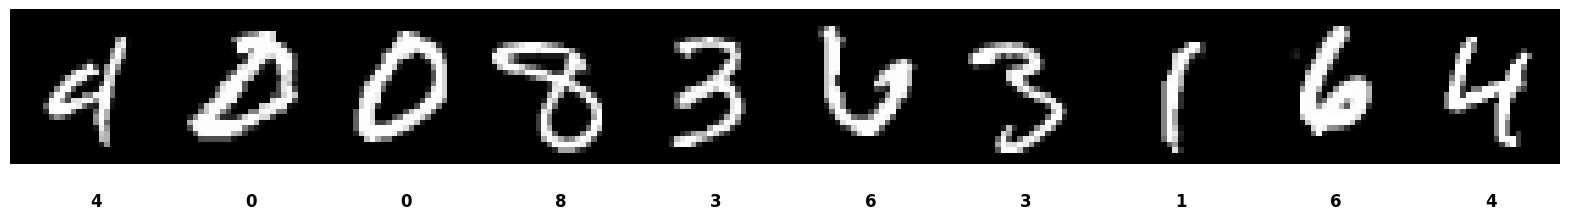

In [4]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

In [5]:
from tensorflow.keras.utils import to_categorical

# 1. What kind of data occurs in our dataset?
# Handwritten digit images (0-9) in grayscale.

# 2. How many data samples do we have in train and test datasets?
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

# 3. How many colour channels does the input variable have?
# The dataset images are in grayscale, so they have 1 color channel. However, the original data doesn't explicitly include the channel dimension.
channels = 1

# 4. What is the size of the input images?
image_size = X_train.shape[1:3]  # This ignores the color channel

# 5. Necessary preprocessing of the input data X
# Normalize pixel values and add a channel dimension
X_train_norm = X_train.reshape((train_samples, 28, 28, channels)).astype('float32') / 255
X_test_norm = X_test.reshape((test_samples, 28, 28, channels)).astype('float32') / 255

# 6. How many classes do we have in target variable?
num_classes = len(np.unique(y_train))

# 7. Necessary preprocessing of target variable y
# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Print the answers
print(f"Number of training samples: {train_samples}")
print(f"Number of test samples: {test_samples}")
print(f"Image size: {image_size[0]}x{image_size[1]} pixels")
print(f"Number of color channels: {channels}")
print(f"Number of classes: {num_classes}")

# Check if preprocessing steps were correct
print(f"Shape of X_train after normalization and reshaping: {X_train_norm.shape}")
print(f"Shape of y_train after one-hot encoding: {y_train_encoded.shape}")

Number of training samples: 60000
Number of test samples: 10000
Image size: 28x28 pixels
Number of color channels: 1
Number of classes: 10
Shape of X_train after normalization and reshaping: (60000, 28, 28, 1)
Shape of y_train after one-hot encoding: (60000, 10)


#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [6]:
# Normalize the input images to the range [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape the input data to include the channel dimension (required for Keras CNNs)
# MNIST images are grayscale, so we use 1 channel
X_train_normalized = X_train_normalized.reshape((-1, 28, 28, 1))
X_test_normalized = X_test_normalized.reshape((-1, 28, 28, 1))

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print("Data preprocessing complete.")
print(f"Shape of training data: {X_train_normalized.shape}")
print(f"Shape of training labels: {y_train_encoded.shape}")


Data preprocessing complete.
Shape of training data: (60000, 28, 28, 1)
Shape of training labels: (60000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 10  # For MNIST digits 0-9

model = Sequential([
    # Convolutional layer: Since this is the first layer, we need to specify the input_shape. MNIST images are 28x28 with 1 color channel
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer: Flattens the input. Does not affect the batch size.
    Flatten(),

    # Dense layer with softmax activation for output
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [8]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.001

###################################
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

model.summary()

###################################
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential"
________________________________________________________________

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [9]:
# Define hyperparameters
epochs = 10
batch_size = 32
validation_split = 0.2  # 20% of training data will be used for validation

# Train the model
history = model.fit(
    X_train_normalized, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split
)

Epoch 1/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2725 - accuracy: 0.9217 - val_loss: 0.1262 - val_accuracy: 0.9668
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1049 - accuracy: 0.9701 - val_loss: 0.0959 - val_accuracy: 0.9733
Epoch 3/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0734 - accuracy: 0.9786 - val_loss: 0.0751 - val_accuracy: 0.9772
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0741 - val_accuracy: 0.9784
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0484 - accuracy: 0.9859 - val_loss: 0.0636 - val_accuracy: 0.9813
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0650 - val_accuracy: 0.9808
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0349 - accuracy: 0.9900 - val_loss: 0.0620 -

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

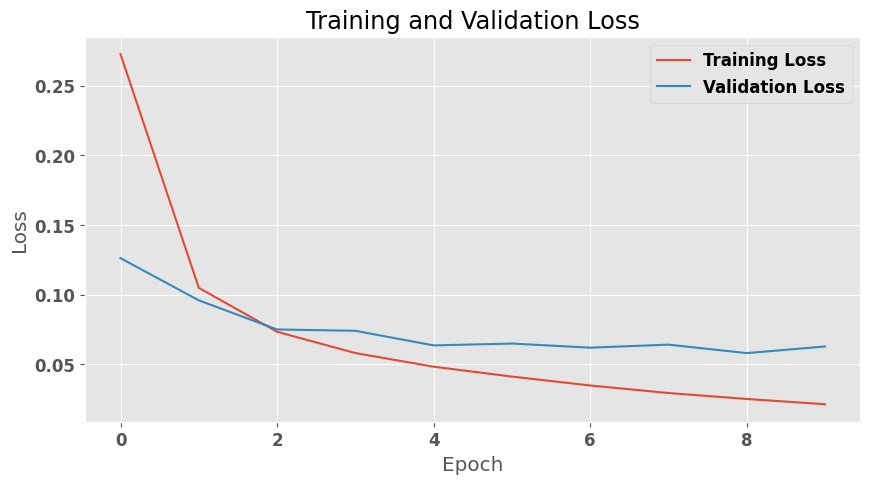

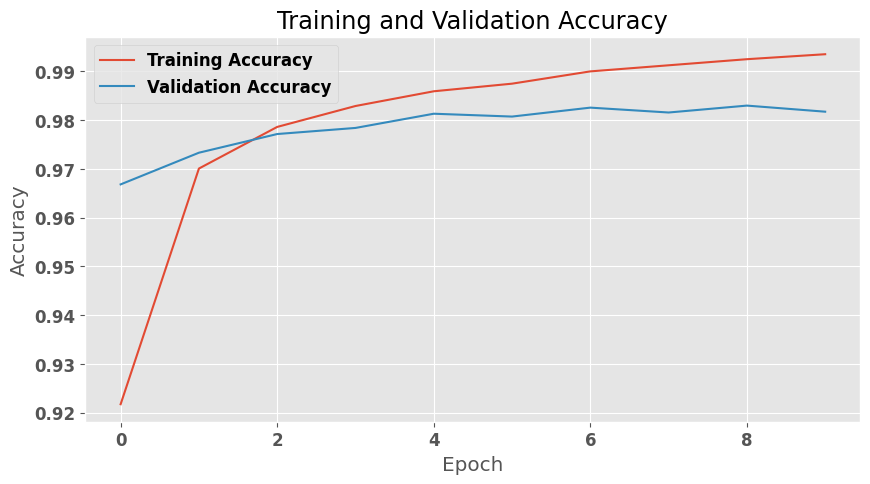

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [11]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the testing dataset
loss, accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Get predictions for the testing dataset
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)


313/313 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9842
Test Loss: 0.0534
Test Accuracy: 0.9842
313/313 [==============================] - 2s 7ms/step
Confusion Matrix:
[[ 971    0    1    1    0    2    2    0    3    0]
 [   0 1130    3    1    1    0    0    0    0    0]
 [   2    4 1011    2    2    0    1    6    4    0]
 [   0    1    1 1000    0    4    0    1    3    0]
 [   1    3    0    0  967    0    2    0    1    8]
 [   2    0    2    6    0  878    4    0    0    0]
 [   8    2    1    0    2    3  939    0    3    0]
 [   0    2    9    3    0    0    0 1011    1    2]
 [   5    0    4    0    1    1    0    5  952    6]
 [   1    4    0    4    3    5    0    8    1  983]]


### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

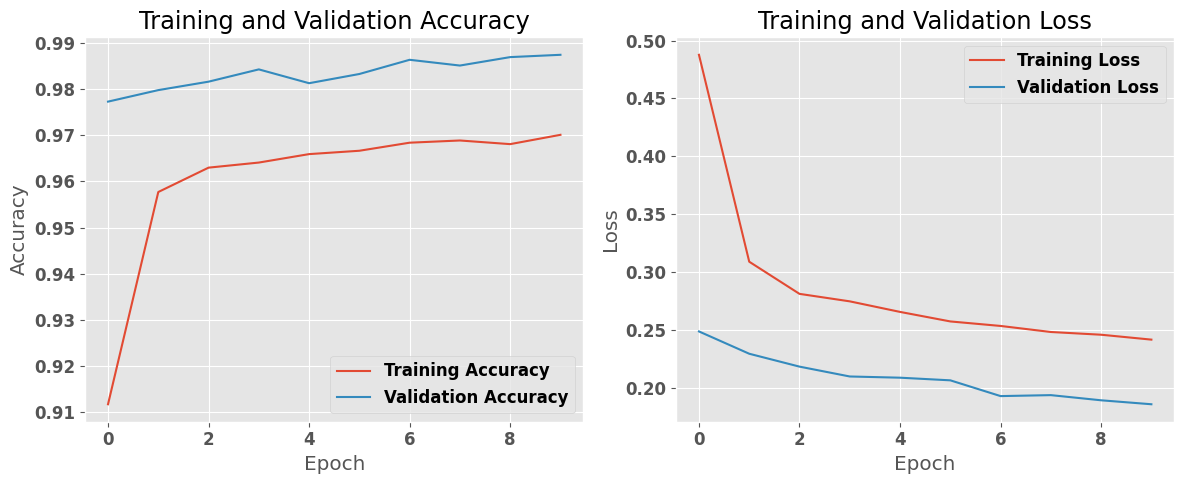

In [12]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(learning_rate=0.001, dropout_rate=0.5, l2_lambda=0.001):
    model = Sequential([
        # Convolutional layer with L2 regularization
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
               kernel_regularizer=l2(l2_lambda)),
        MaxPooling2D(pool_size=(2, 2)),

        # Adding another conv layer with Dropout
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_lambda)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Flatten(),

        # Dense layer with L2 regularization
        Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(dropout_rate),

        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Example of hyperparameters
learning_rate = 0.001
dropout_rate = 0.5
l2_lambda = 0.001

model = build_model(learning_rate, dropout_rate, l2_lambda)
model.summary()

# Define hyperparameters for training
epochs = 10
batch_size = 32
validation_split = 0.2

# Train the model with the training set and validate using a validation set
history = model.fit(
    X_train_normalized, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1
)

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion :

After incorporating regularization techniques and hyperparameter tuning into our Convolutional Neural Network model, we have achieved a promising balance between training and validation metrics. The consistent rise in validation accuracy coupled with a decrease in validation loss suggests that our model is generalizing well to unseen data. Furthermore, the closeness of the training and validation loss values with a slight deviation indicates that our model is not overfitting the training data.

Moreover, the implementation of dropout and L2 regularization has likely contributed to this balanced performance by effectively managing the model's complexity and promoting the learning of more robust features. With the current hyperparameter settings, our model demonstrates excellent potential for accurately classifying handwritten digits, showcasing the strengths of CNNs in image recognition tasks.

This performance might still be enhanced with further fine-tuning, but as it stands, the model is likely ready for real-world applications, such as digit recognition in automated systems or educational software. Our training process, guided by the principles of machine learning best practices, has led to a high-performing model that achieves a great trade-off between bias and variance, ready to make accurate predictions on new, unseen data.